In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_iris

In [2]:
data = load_iris()
print(load_iris()['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

**Fit the target using Linear Regression (LR)** 

In [4]:
X, y = load_iris(return_X_y=True)

reg = LinearRegression()

reg.fit(X,y)

LinearRegression()

In [5]:
y_pred = reg.predict(X)

In [6]:
# Scores:
print(reg.score(X, y))
print(reg.coef_)

0.9303939218549564
[-0.11190585 -0.04007949  0.22864503  0.60925205]


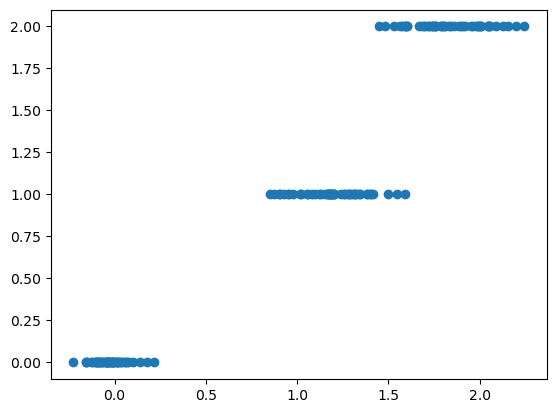

In [7]:
import matplotlib.pylab as plt

plt.scatter(y_pred ,y)

**Fit the target using Polynomial Regression**.

In [9]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)

poly_features = poly.fit_transform(X)#.reshape(-1, 1) # fit_transform creates x^2 values from x


In [10]:
poly_reg_model = LinearRegression()

In [11]:
print(y.shape)
print(poly_features.shape)

(150,)
(150, 15)


In [12]:
poly_reg_model.fit(poly_features, y)

LinearRegression()

In [13]:
y_pred = poly_reg_model.predict(poly_features)

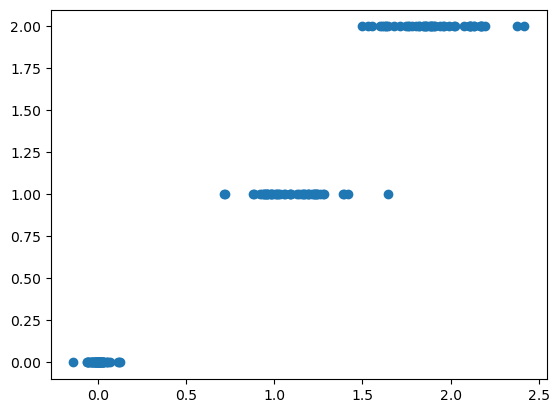

In [14]:
plt.scatter(y_pred, y) 


In [15]:
# Scores:
print(poly_reg_model.score(poly_features, y))
print(poly_reg_model.coef_)

0.9508314685950177
[ 0.          0.27704427 -1.52157006 -0.47837491  2.04515326 -0.27629758
  0.66831909  0.18330733  0.07770254 -0.23072689 -0.14912759 -0.54061272
  0.09021388 -0.43283909  0.54446337]


**Present accuracy**

In [17]:
from sklearn.metrics import accuracy_score
#accuracy_score(y_pred, y)

In [18]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred, y)

0.03277902093665489


Calculate other metrics like **RMSE**, **R2**, etc. Analize them.  


In [20]:
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score

print(root_mean_squared_error(y_pred, y))
print(r2_score(y_pred, y))

0.18104977474897585
0.9482889102548997


Plot learning curves (R2, [MAPE](https://torchmetrics.readthedocs.io/en/stable/regression/mean_absolute_percentage_error.html), **MSE** \- Loss function)

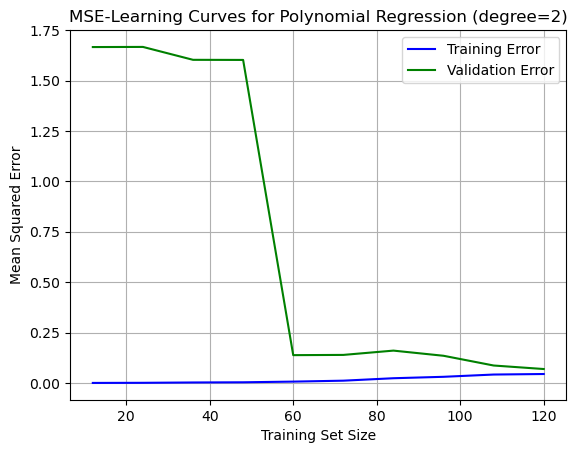

In [22]:
from sklearn.model_selection import learning_curve
import numpy as np
#??learning_curve
train_sizes, train_scores, validation_scores = learning_curve(
    poly_reg_model, X, y, train_sizes=np.linspace(0.1, 1.0, 10),scoring='neg_mean_squared_error')

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)

plt.plot(train_sizes, -train_mean, label='Training Error', color='blue')
plt.plot(train_sizes, -validation_mean, label='Validation Error', color='green')

plt.title('MSE-Learning Curves for Polynomial Regression (degree=2)')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.legend(loc='best')
plt.grid(True)
plt.show()

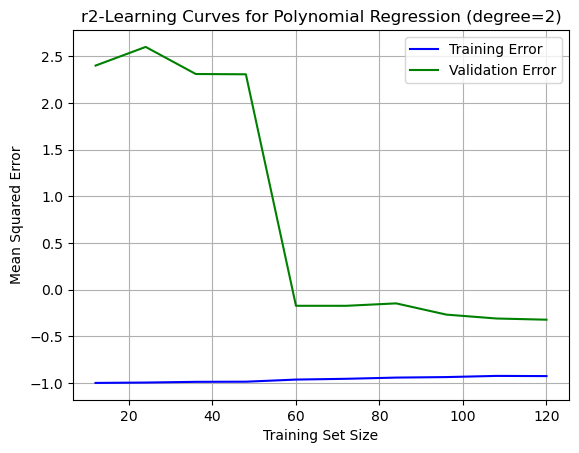

In [23]:
train_sizes, train_scores, validation_scores = learning_curve(
    poly_reg_model, X, y, train_sizes=np.linspace(0.1, 1.0, 10),scoring='r2')

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)

plt.plot(train_sizes, -train_mean, label='Training Error', color='blue')
plt.plot(train_sizes, -validation_mean, label='Validation Error', color='green')

plt.title('r2-Learning Curves for Polynomial Regression (degree=2)')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.legend(loc='best')
plt.grid(True)
plt.show()